<a href="https://colab.research.google.com/github/MHZur/Diplomado_Publico/blob/main/tarea_bd_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Descripción del dataset: 
Vtas de vehículos en Estados Unidos, son 43 marcas y 445 modelos que abarcan el periodo de 2013 a 2022. (Última actualización hace 4 meses)

Data source: www.goodcarbadcar.net, www.marklines.com/en/vehicle_sales/index

* Objetivo: Realizar regresión con datos del 2013 al 2018 y comparar contra los datos de 2019 en adelante. 

### Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px

### Conexión a drive y lectura de archivo

In [ ]:
drive.mount("/content/drive")
%cd /content/drive/My \Drive/Diplomado
df = pd.read_csv("us_car_model_sales_2013_2022.csv")


Mounted at /content/drive
/content/drive/My Drive/Diplomado


In [ ]:
df.head(10)

,Maker/Brand,Maker_Brand,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Acura,Acura ILX,20430,17854,18531,14597,11757,11273.0,14685.0,13414.0,13900.0,6296
1,Acura,Acura Integra,0,0,0,0,0,0.0,0.0,0.0,0.0,13027
2,Acura,Acura TL,24318,10616,88,0,0,0.0,0.0,0.0,0.0,0
3,Acura,Acura TLX,0,19127,47080,37156,34846,30468.0,26548.0,21785.0,26100.0,11508
4,Acura,Acura TSX,17484,6287,35,4,0,0.0,0.0,0.0,0.0,0
5,Acura,Acura RL,0,0,0,0,0,0.0,0.0,0.0,0.0,0
6,Acura,Acura RLX,0,3413,2195,1478,1237,1931.0,1019.0,1055.0,214.0,3
7,Acura,Acura RLX/RL,5053,0,0,0,0,0.0,0.0,0.0,0.0,0
8,Acura,Acura NSX,0,0,0,269,581,170.0,238.0,128.0,124.0,298
9,Acura,Acura RDX,44750,44865,51026,52361,51295,63580.0,62876.0,52785.0,57013.0,24749


In [ ]:
df.shape[0]

445

In [ ]:
df["Maker/Brand"].unique()

array(['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'BMW',
       'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ferrari',
       'Fiat', 'Ford', 'GMC', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar',
       'Jeep', 'Kia', 'Lamborghini', 'Lexus', 'Lincoln', 'Lucid Motors',
       'Maserati', 'Mazda', 'Mercedes0Benz', 'MINI', 'Mitsubishi',
       'Nissan', 'Polestar', 'Porsche', 'Ram', 'Rivian', 'Scion', 'smart',
       'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volvo', 'VW'], dtype=object)

In [ ]:
df["universe"] = 1

In [ ]:
# Remplazamos los ceros por NAN's para hacer el filtrado de esos registros.

df.replace({0:np.nan}, inplace = True)

print(df)

    Maker/Brand    Maker_Brand     2013     2014     2015     2016     2017  \
0         Acura      Acura ILX  20430.0  17854.0  18531.0  14597.0  11757.0   
1         Acura  Acura Integra      NaN      NaN      NaN      NaN      NaN   
2         Acura       Acura TL  24318.0  10616.0     88.0      NaN      NaN   
3         Acura      Acura TLX      NaN  19127.0  47080.0  37156.0  34846.0   
4         Acura      Acura TSX  17484.0   6287.0     35.0      4.0      NaN   
..          ...            ...      ...      ...      ...      ...      ...   
440          VW        VW ID.4      NaN      NaN      NaN      NaN      NaN   
441          VW        VW Taos      NaN      NaN      NaN      NaN      NaN   
442          VW      VW Tiguan  30002.0  25121.0  35843.0  43638.0  46983.0   
443          VW       VW Atlas      NaN      NaN      NaN      NaN  27119.0   
444          VW     VW Touareg   8233.0   6961.0   7037.0   4223.0   3545.0   

         2018      2019      2020      2021     202

In [ ]:
df.dropna(axis = 0, how = 'any', inplace = True) 

print(f"Cantidad de registros que cuentan con info para todos los años: {df.shape[0]}")

Cantidad de registros que cuentan con info para todos los años: 172


In [ ]:
df_agg = df.groupby("Maker/Brand")["2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"].sum().reset_index()

<ipython-input-11-59d191da282b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_agg = df.groupby("Maker/Brand")["2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"].sum().sort_values(by = ["2022"], ascending = False).reset_index()


In [ ]:
df_agg["2020-2019"] = df_agg["2020"]-df_agg["2019"]

In [ ]:
df_top5 = df_agg.sort_values(by = ["2020-2019"], ascending = True).reset_index(drop=True).head(5) # Reseteamos el index para la utilizarlo al graficar
df_top5

,Maker/Brand,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2020-2019
0,Nissan,1051146.0,1194059.0,1294275.0,1389472.0,1420327.0,1317083.0,1167385.0,758903.0,836090.0,627388.0,-408482.0
1,Chevrolet,1893154.0,1976252.0,2082880.0,2034440.0,2035555.0,2093285.0,2051135.0,1776221.0,1452293.0,1609589.0,-274914.0
2,Toyota,1782433.0,1905049.0,2014691.0,2006000.0,2007759.0,2012351.0,1981276.0,1760186.0,1954851.0,1738427.0,-221090.0
3,Honda,1284952.0,1298323.0,1302514.0,1334839.0,1340174.0,1304888.0,1268526.0,1049507.0,1107707.0,724271.0,-219019.0
4,Ford,1661496.0,1652661.0,1727018.0,1774207.0,1840320.0,1787613.0,1709062.0,1511546.0,1374151.0,1251328.0,-197516.0


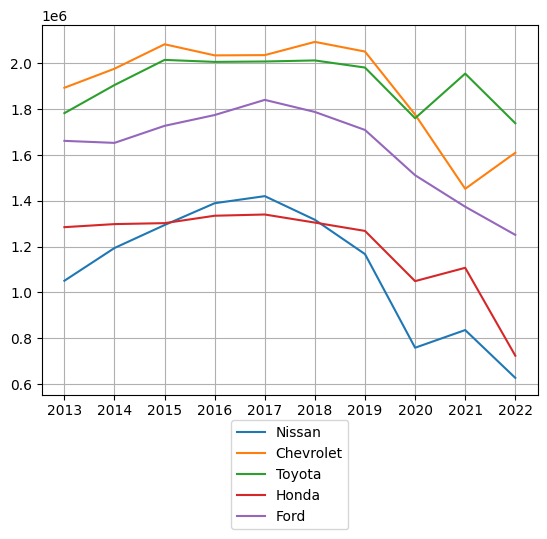

In [ ]:
for i in range(0,5):
  plt.plot(['2013','2014','2015','2016','2017','2018', '2019', '2020', '2021', '2022'], df_top5.iloc[i][1:11], label = df_top5["Maker/Brand"][i])

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05)) 
plt.grid()
plt.show()

In [ ]:
df_top5[df_top5["Maker/Brand"] == "Nissan"]

,Maker/Brand,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2020-2019
0,Nissan,1051146.0,1194059.0,1294275.0,1389472.0,1420327.0,1317083.0,1167385.0,758903.0,836090.0,627388.0,-408482.0


### Regresión polinomial

In [ ]:
y = df_top5.values[0][1:11]
y

array([1051146.0, 1194059.0, 1294275.0, 1389472.0, 1420327.0, 1317083.0,
       1167385.0, 758903.0, 836090.0, 627388.0], dtype=object)

In [ ]:
x = df_top5.columns.to_list()[1:11]
x = list(map(int, x))
x

[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [ ]:
df_2 = pd.DataFrame({"x" : x, "y" : y})
df_2

,x,y
0,2013,1051146.0
1,2014,1194059.0
2,2015,1294275.0
3,2016,1389472.0
4,2017,1420327.0
5,2018,1317083.0
6,2019,1167385.0
7,2020,758903.0
8,2021,836090.0
9,2022,627388.0


In [ ]:
x = df_2.iloc[:, :-1].values
print(x)
y = df_2.iloc[:, 1].values
print(y)

[[2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]
 [2022]]
[1051146.0 1194059.0 1294275.0 1389472.0 1420327.0 1317083.0 1167385.0
 758903.0 836090.0 627388.0]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 3/10, random_state = 0, shuffle = False)

In [ ]:
y_train

array([1051146.0, 1194059.0, 1294275.0, 1389472.0, 1420327.0, 1317083.0,
       1167385.0], dtype=object)

In [ ]:
sc_x = StandardScaler()

x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(x_train.reshape(-1, 1))

poly_reg_model = LinearRegression()

poly_reg_model.fit(poly_features, y_train)

y_predicted = poly_reg_model.predict(poly_features)

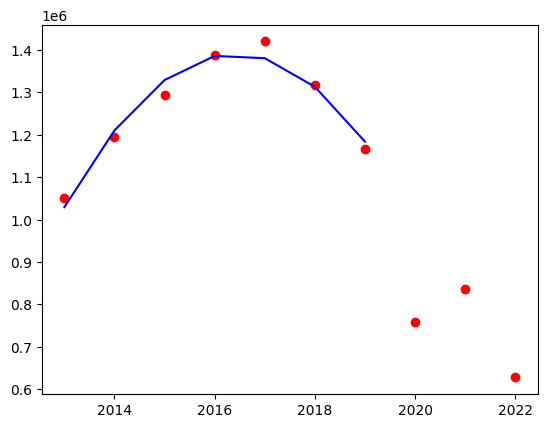

In [ ]:
x_grid = np.arange(min(x), max(x), 1)
x_grid = x_grid.reshape(len(x_grid), 1)
plt.scatter(x, y, color = "red")
plt.plot(x_train, y_predicted, color = "blue")
plt.show()

In [ ]:
coef = poly_reg_model.coef_
coef

array([ 1.25259615e+08, -3.10599881e+04])

In [ ]:
poli = lambda x : coef[0] + coef[1] * x + coef[2] * x**2 